In [1]:
import anndata 
import pandas as pd
import scanpy as sc
import pybedtools
import numpy as np
from ALLCools.plot import categorical_scatter,continuous_scatter
import matplotlib.pyplot as plt
from ALLCools.clustering import \
    tsne, \
    significant_pc_test, \
    filter_regions, \
    remove_black_list_region, \
    lsi, \
    binarize_matrix
import joblib
from amb import *
from ALLCools.clustering import *


plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi']=300
plt.rcParams['pdf.fonttype']=42

age_palette = get_age_palette()
age_palette['8wk'] = age_palette['2mo']

ct_palette = joblib.load('/home/qzeng_salk_edu/project/240319_te/AgingMajorType_Palette')
# replace the keys by .apply(lambda x: x.replace(' ','_').replace('/',''))
ct_palette = {x.replace(' ','_').replace('/',''):y for x,y in ct_palette.items()}

region_palette = get_major_region_palette()

In [ ]:
group_name = 'CA1-ProS_Glut'

In [7]:
mc_type = 'CGN'
te_class = 'LINE'
inout='out20'
ct = group_name

In [8]:
genomepath = '/ref/m3C/mm10.main.nochrM.nochrY.chrom.sizes'
gene_bed = pybedtools.BedTool('TE_use.gencode.vM22.annotation.gene.sorted.bed')
te_bed = pybedtools.BedTool(f'/ref/repeatmasker-with-id/hg38.repeatmasker.repClass-{te_class}.bed')

In [9]:
meta = pd.read_csv('/data/metadata/240104_m3C_META.csv', index_col =0)
meta['AgingMajorType'] = meta['AgingMajorType'].apply(lambda x: x.replace(' ','_').replace('/',''))
meta.head()

,InputReadPairs,InputReadPairsBP,TrimmedReadPairs,R1WithAdapters,R1QualTrimBP,R1TrimmedReadsBP,R2WithAdapters,R2QualTrimBP,R2TrimmedReadsBP,UniqueMappedReads,...,DissectionRegion,Region,Replicate,l1,mc_m3c-co_cluster_l1,mc_m3c-co_cluster_l2,CellType,CellSubclass,AgingMajorType,Class
cell,,,,,,,,,,,,,,,,,,,,,
AMB_220628_18mo_3F_4E_1_P1-1-I3-A1,1710943,516615812,1710512,309,766343,216480647,874,649089,230238965,1870858,...,ACB-1+ACB-2,Nucleus_accumbens,rep2,13,23,0-0,STR D1 Gaba,STR D1 Gaba,STR_D1_Gaba,Gaba
AMB_220628_18mo_3F_4E_1_P1-1-I3-A13,1688475,510130057,1688130,316,725418,213815592,832,673498,227339515,1820523,...,ACB-1+ACB-2,Nucleus_accumbens,rep2,11,6,12-6,STR-PAL Chst9 Gaba,STR D1 Sema5a Gaba,STR_D1_Sema5a_Gaba,Gaba
AMB_220628_18mo_3F_4E_1_P1-1-I3-A14,2158376,651979882,2157941,456,998559,273186730,1132,869248,290536436,2374173,...,ACB-1+ACB-2,Nucleus_accumbens,rep2,8,4,2-2,Astro NN,Astro-TE NN,Astro-TE_NN,NN
AMB_220628_18mo_3F_4E_1_P1-1-I3-A2,1582810,478040623,1582446,283,708122,200329678,853,626267,213020525,1746308,...,ACB-1+ACB-2,Nucleus_accumbens,rep2,9,8,7-6,STR D2 Gaba,STR D2 Gaba,STR_D2_Gaba,Gaba
AMB_220628_18mo_3F_4E_1_P1-1-I3-B1,1766714,533610284,1766279,411,810795,223604054,1045,691737,237777442,1968711,...,ACB-1+ACB-2,Nucleus_accumbens,rep2,13,23,0-0,STR D1 Gaba,STR D1 Gaba,STR_D1_Gaba,Gaba


In [24]:
#ads = anndata.read_h5ad(f"{ct}.{te_class}.downsampled.h5ad")
ads =  anndata.read_h5ad(f"adata/celltype/{ct}.{te_class}.downsampled.h5ad")
ads.obs['celltype'] = meta['AgingMajorType']
ads.obs['Age'] = meta['Age']
ads.obs['Region'] = meta['Region']
ads

AnnData object with n_obs × n_vars = 1562 × 954358
    obs: 'celltype', 'Age', 'Region'

In [25]:
## select Microglia_NN
ads = ads[ads.obs['celltype']==ct].copy()
## selct var-names in te['te_id']
#ads = ads[:,te['te_id'].unique()]
ads

AnnData object with n_obs × n_vars = 1562 × 954358
    obs: 'celltype', 'Age', 'Region'

In [26]:
if inout=='out20':
    feats = te_bed.subtract(gene_bed.flank(b=20000, g=genomepath)).to_dataframe()['name'].tolist()
elif inout=='out10':
    feats = te_bed.subtract(gene_bed.flank(b=10000, g=genomepath)).to_dataframe()['name'].tolist()
elif inout=='out2':
    feats = te_bed.subtract(gene_bed.flank(b=2000, g=genomepath)).to_dataframe()['name'].tolist()
elif inout=='out':
    feats = te_bed.subtract(gene_bed).to_dataframe()['name'].tolist()
elif inout=='in':
    feats = te_bed.intersect(gene_bed,).to_dataframe()['name'].tolist()
else:
    feats = te_bed.to_dataframe()['name'].tolist()

In [27]:
shared_feats = list(set(feats) & set(ads.var_names))
len(shared_feats)

546795

In [28]:
# select shared features from ads
ads = ads[:,shared_feats]
ads

View of AnnData object with n_obs × n_vars = 1562 × 546795
    obs: 'celltype', 'Age', 'Region'

In [29]:
sc.pp.filter_genes(ads, min_cells=3)

/opt/conda/lib/python3.10/site-packages/scanpy/preprocessing/_simple.py:284: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var["n_cells"] = number


In [30]:
pc_cutoff = 0.1
lsi(ads, algorithm='arpack', obsm='X_pca')
n_components = significant_pc_test(ads, p_cutoff=pc_cutoff, update=True)


13 components passed P cutoff of 0.1.
Changing adata.obsm['X_pca'] from shape (1562, 100) to (1562, 13)


In [31]:
resolution = 0.5
sc.pp.neighbors(ads)
sc.tl.leiden(ads, resolution=resolution)
sc.tl.umap(ads)

In [32]:
tsne(ads,
     obsm='X_pca',
     metric='euclidean',
     exaggeration=-1,  # auto determined
     perplexity=30,
     n_jobs=-1)


## plot

In [33]:
# change ads.X to df
df = pd.DataFrame(ads.X.toarray(), index=ads.obs_names, columns=ads.var_names)
ads.obs['hypo_te_counts'] = df.sum(axis = 1)

In [21]:
# # selection Regions in 'Posterior_Hippocampus' and 'Anterior_Hippocampus'
# ads = ads[ads.obs['Region'].isin(['Posterior_Hippocampus','Anterior_Hippocampus'])].copy()
# ads

In [34]:
ads

AnnData object with n_obs × n_vars = 1562 × 345840
    obs: 'celltype', 'Age', 'Region', 'leiden', 'hypo_te_counts'
    var: 'n_cells'
    uns: 'neighbors', 'leiden', 'umap'
    obsm: 'X_pca', 'X_umap', 'X_tsne'
    obsp: 'distances', 'connectivities'

/opt/conda/lib/python3.10/site-packages/ALLCools/plot/text_anno_scatter.py:33: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for text, sub_df in data.groupby(anno_col):


Text(0.5, 0.98, 'LINE CA1-ProS_Glut out20')

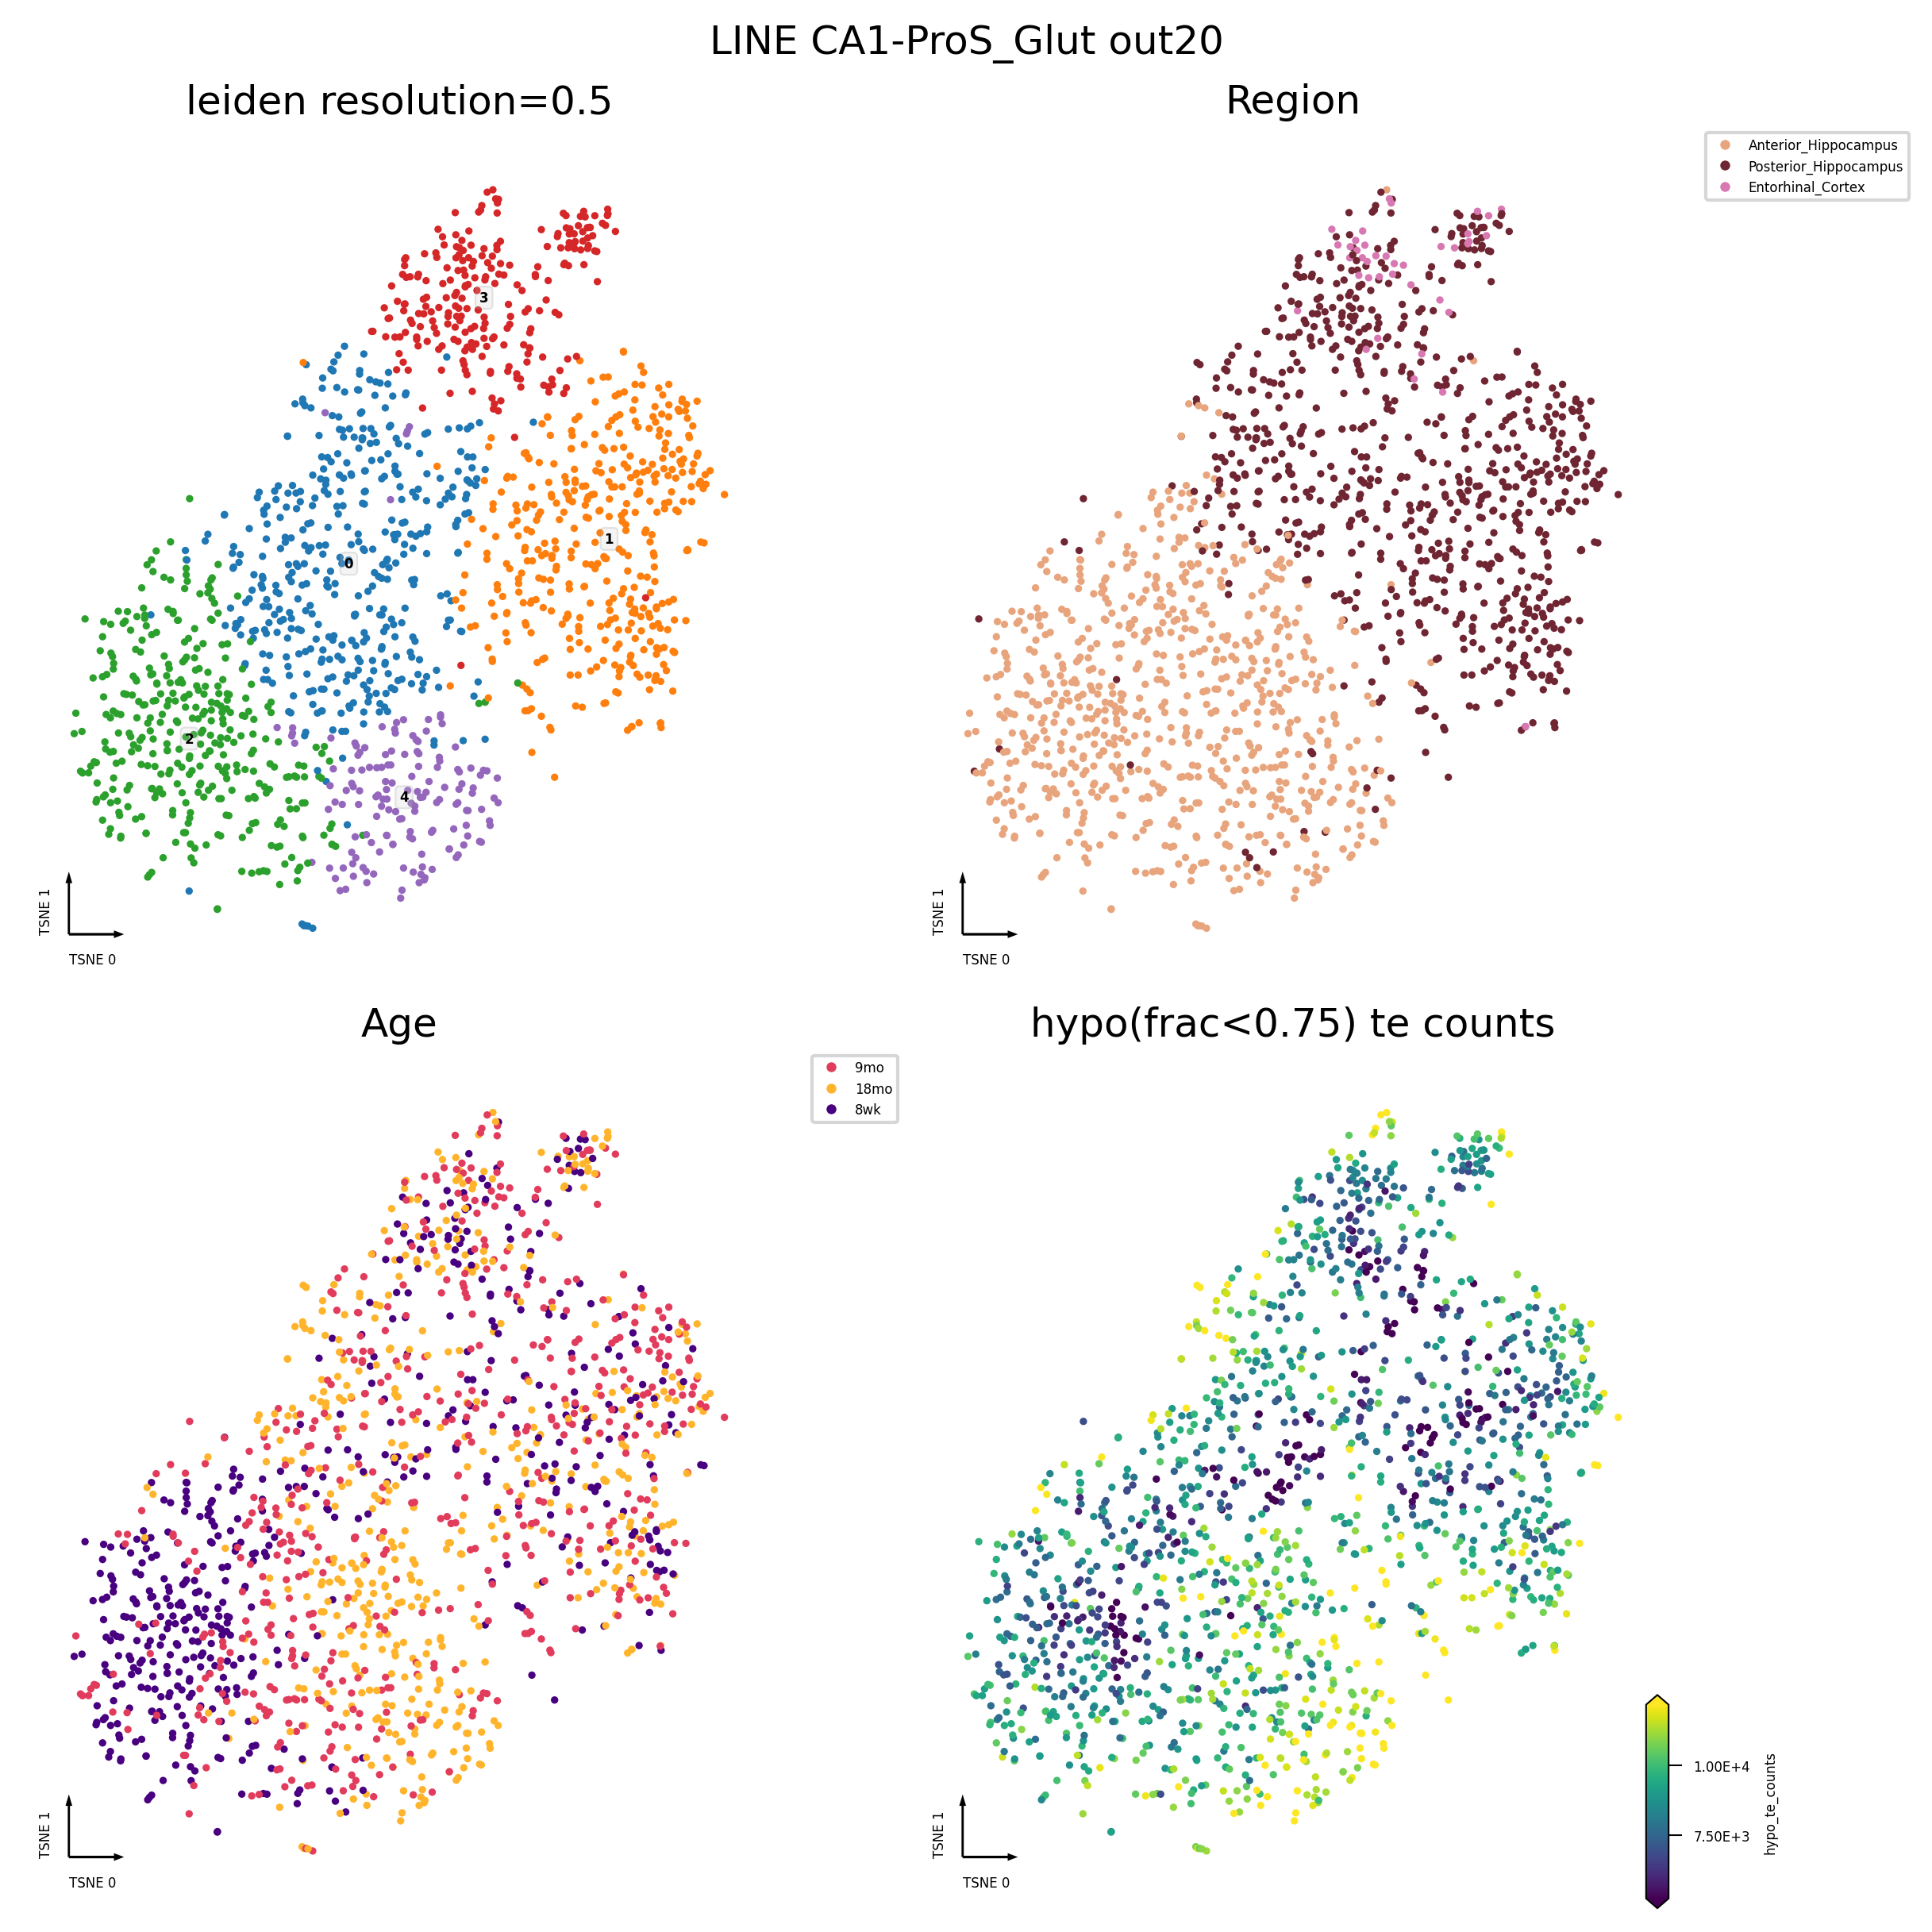

In [35]:
fig, axes = plt.subplots(figsize=(8, 8),ncols = 2,nrows = 2,  dpi=300, constrained_layout=True)
ax = axes[0,0]
categorical_scatter(data=ads,
                    ax=ax, 
                    coord_base='tsne', 
                    hue='leiden', 
                    rasterized= True,
                    text_anno = 'leiden',
                    show_legend=False
                    )

ax.set_title(f"leiden resolution={resolution}")

ax = axes[0,1]
categorical_scatter(data=ads, 
                    ax=ax, 
                    coord_base='tsne', 
                    hue='Region', 
                    #text_anno = 'Region',
                    rasterized= True,
                    show_legend=True, 
                    palette=region_palette
                    )
ax.set_title(f"Region")                    

ax = axes[1,0]
categorical_scatter(data=ads, 
                   ax=ax, 
                   coord_base='tsne', 
                   hue='Age', 
                   #text_anno = 'Age',
                   rasterized= True,
                   show_legend=True, 
                   palette=age_palette)
ax.set_title(f"Age")  

ax = axes[1,1]
continuous_scatter(data=ads, 
                   ax=ax, 
                   coord_base='tsne', 
                   hue='hypo_te_counts', 
                   hue_norm=(np.percentile(ads.obs['hypo_te_counts'], 5), np.percentile(ads.obs['hypo_te_counts'], 95)),
                   )
ax.set_title(f"hypo(frac<0.75) te counts")  

plt.suptitle(f"{te_class} {ct} {inout}")
#fig.savefig(f"figure/{ct}.{te_class}.{inout}.tsne.pdf")

In [ ]:
# select high vraiable feature among Age
#sc.pp.highly_variable_genes(ads, n_top_genes=2000, flavor='seurat', n_bins=20)

# # cluster_enriched_features(ads,
# #                           cluster_col='Age',
# #                           top_n=200,
# #                           alpha=0.05,
# #                           stat_plot=True,
# #                           method='mc')

# cef = ads.var[f'Age_enriched_features'].copy()
# cef.sum()

# cef = ads.var[f'Age_enriched_features'].copy()
# ads = ads[:,cef]